In [1]:
import numpy as np
from keras import models,optimizers,layers

train_x = []
train_y = [] # 0:Init 1:CPU 2:GPU


test_x = []
test_y = [] # as same as above 

SELECT_DEVICE = 2
TIME_PART = 10

def one_hot(labels,dimension=TIME_PART+1):
    result = np.zeros((len(labels),dimension))
    for i , label in enumerate(labels):
        result[i, label] = 1.
    return result

def loadData():
    data = []
    maxi = [0,0,0,0,0,0]
    x_num = 3
    y_num = 3
    cnt = 0
    global train_x,train_y,test_x,test_y
    
    for i in range(y_num):
        train_y.append([])
        test_y.append([])
        
    with open("Runtime Data.txt", "r") as file:     # extract  info from txt
        for line in file:
            line = line[0:-1]
            line = line.split(" ")
            for item in range(len(line)) : line[item] = float(line[item])
            data.append(line)

            if cnt%5 != 0 :
                train_x.append(line[0:x_num])
                for i in range(y_num):
                    train_y[i].append(line[x_num+i])
            else :
                test_x.append(line[0:x_num])
                for i in range(y_num): 
                    test_y[i].append(line[x_num+i])
            
            for i in range(x_num+y_num) :
                maxi[i] = max(maxi[i],line[i])
            
            cnt += 1
            
    for i in range (len(train_x)):  # normalization and  tagging
        for j in range(x_num):
            train_x[i][j] /= maxi[j]
            continue
        for j in range (y_num):
            train_y[j][i] = int(train_y[j][i]/maxi[x_num+j]*TIME_PART)
            
    for i in range(len(test_x)):
        for j in range(x_num):
            test_x[i][j] /= maxi[j]
            continue
        for j in range (y_num):
            test_y[j][i] = int(test_y[j][i]/maxi[x_num+j]*TIME_PART)
            
    for i in range(y_num):     #list to np
        test_y[i] = one_hot(test_y[i])
        train_y[i] = one_hot(train_y[i])

    train_x = np.array(train_x)
    test_x = np.array(test_x)
            
            
            
loadData()


INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(TIME_PART+1, activation = 'softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [3]:
history = model.fit(train_x,train_y[SELECT_DEVICE],epochs=100,batch_size=8,validation_data=(test_x,test_y[SELECT_DEVICE]))
print("x_train:")
print(train_x)
print("y_train:")
print(train_y[SELECT_DEVICE])

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpx8xy1e92.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpx8xy1e92.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 10s 10s/step - loss: 2.4670 - accuracy: 0.0000e+00 - val_loss: 2.3732 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 11ms/step - loss: 2.3934 - accuracy: 0.0000e+00 - val_loss: 2.3473 - val_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 11ms/step - loss: 2.3455 - accuracy: 0.0000e+00 -

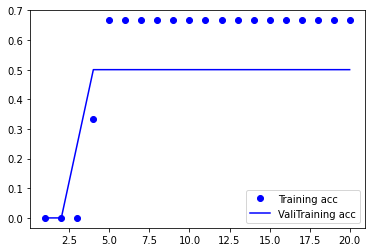

[[0.178976   0.08094013 0.08162501 0.10959786 0.10964035 0.05159489
  0.06847705 0.07298595 0.08652145 0.08570035 0.07394089]
 [0.17143548 0.0740599  0.08107251 0.13936813 0.11270469 0.04621998
  0.07111873 0.07681929 0.08393289 0.07415408 0.06911426]
 [0.17325458 0.08292097 0.08114152 0.11017819 0.10727778 0.05193814
  0.06654594 0.07421926 0.08989528 0.08884188 0.07378653]
 [0.17504543 0.07937735 0.08091307 0.11713517 0.11025286 0.05082392
  0.06842683 0.07496023 0.08705561 0.08317897 0.07283051]]


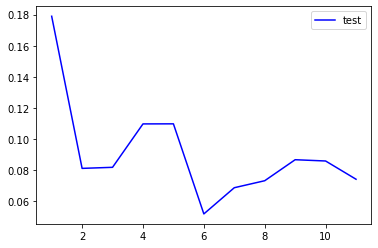

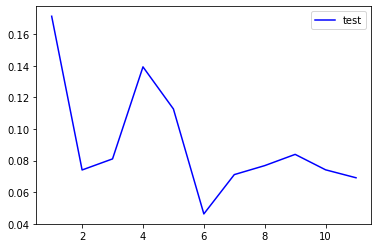

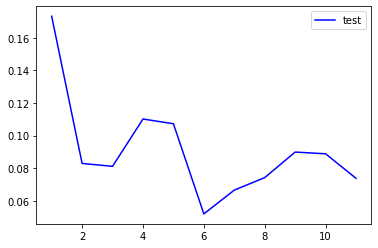

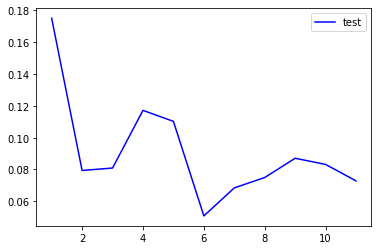

In [5]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1,len(acc)+1)    
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='ValiTraining acc')
plt.legend()
plt.show()

predict_result = model.predict(test_x)
epochs = range(1,len(predict_result[0])+1)
print(predict_result)
for i in range(len(test_x)):
    plt.plot(epochs,predict_result[i],'b',label='test')
    plt.legend()
    plt.show()